### Estimation of exchange interactions between spins by baysian method

reference : https://arxiv.org/abs/1701.09063

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
J = np.array([
    1,
    4,
    5,
    6,
    0,
    0,
    0
])

In [3]:
b = 0.1

In [4]:
interactions = np.array([
    [0,    J[0], J[1], J[3], 0,    0,    0,    0,    0,    0,    0,    0,    0],  # spin 1
    [J[0], 0,    J[2], J[0], 0, J[5],    0,    0,    0,    0,    0,    0,    0],  # spin 2
    [J[1], J[2], 0,    J[1], 0, J[4],    0,    0,    0,    0,    0,    0,    0],  # spin 3
    [J[3], J[0], J[1], 0,    J[1], J[0], J[3], 0,    0,    0,    0,    0,    0],  # spin 4
    [0,    0,    J[6], J[2], 0,    J[2], J[1], 0,    J[6], 0,    0,    0,    0],  # spin 5
    [0,    J[5], J[4], J[0], J[2], 0,    J[0], J[5], 0,    0,    0,    0,    0],  # spin 6
    [0,    0,    0,    J[3], J[1], J[0], 0,    J[0], J[1], J[3], 0,    0,    0],  # spin 7
    [0,    0,    0,    0,    0,    J[5], J[0], 0,    J[2], J[0], 0,    J[5], 0],  # spin 8
    [0,    0,    0,    0, J[6],    J[4], J[1], J[2], 0,    J[1], J[6], J[4], 0],  # spin 9
    [0,    0,    0,    0,    0,    0,    J[3], J[0], J[1], 0,    J[1], J[0], J[3]],  # spin 10
    [0,    0,    0,    0,    0,    0,    0,    0,    J[6], J[1], 0,    J[2], J[1]],  # spin 11
    [0,    0,    0,    0,    0,    0,    0,    J[5], J[4], J[0], J[2], 0,    J[0]],  # spin 12
    [0,    0,    0,    0,    0,    0,    0,    0,    0,    J[3], J[1], J[0], 0],  # spin 13
])

In [5]:
def spin_hamiltonian(spins, interactions, b, h=0.0):
    energy = 0.
    for i, s1 in enumerate(spins):
        for j, s2 in enumerate(spins):
            energy += interactions[i][j]*(s1*s2 - b*interactions[i][j]*(s1*s2)**2)
    energy *= 0.5
    for s in spins:
        energy -= h*s
    return energy

In [6]:
spins = np.random.randint(0, 2, 13) - 0.5

In [7]:
spins

array([-0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5,  0.5,
       -0.5,  0.5])

In [8]:
spin_hamiltonian(spins, interactions, b, 1.4)

4.321875000000005

In [9]:
print(2**14)

16384


In [10]:
def get_min_energy(interactions, b, h=0.0):
    spins = []
    min_energy = float('inf')
    for s1 in (-0.5, 0.5):
        for s2 in (-0.5, 0.5):
            for s3 in (-0.5, 0.5):
                for s4 in (-0.5, 0.5):
                    for s5 in (-0.5, 0.5):
                        for s6 in (-0.5, 0.5):
                            for s7 in (-0.5, 0.5):
                                for s8 in (-0.5, 0.5):
                                    for s9 in (-0.5, 0.5):
                                        for s10 in (-0.5, 0.5):
                                            for s11 in (-0.5, 0.5):
                                                for s12 in (-0.5, 0.5):
                                                    for s13 in (-0.5, 0.5):
                                                        s = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13]
                                                        energy = spin_hamiltonian(s, interactions, b, h)
                                                        if energy < min_energy:
                                                            spins = s.copy()
                                                            min_energy = energy
    return min_energy, spins

In [11]:
h_hist = []
m_hist = []
for h in range(20):
    min_energy, spins = get_min_energy(interactions, b, h)
    print('h : ', h)
    print('m : ', abs(sum(spins)))
    h_hist.append(h)
    m_hist.append(abs(sum(spins))/(len(spins)*0.5))

h :  0
m :  0.5
h :  1
m :  0.5
h :  2
m :  0.5
h :  3
m :  4.5
h :  4
m :  4.5
h :  5
m :  4.5
h :  6
m :  4.5
h :  7
m :  4.5
h :  8
m :  4.5
h :  9
m :  4.5
h :  10
m :  4.5
h :  11
m :  4.5
h :  12
m :  6.5
h :  13
m :  6.5
h :  14
m :  6.5
h :  15
m :  6.5
h :  16
m :  6.5
h :  17
m :  6.5
h :  18
m :  6.5
h :  19
m :  6.5


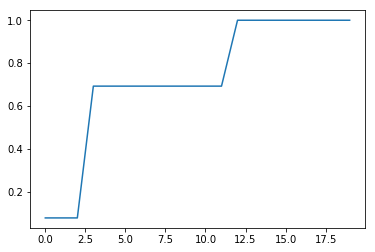

In [12]:
plt.plot(h_hist, m_hist)

In [9]:
# {スピン種類番号: {相互作用するスピンの相対位置: 相互作用}}
interactions = {
    0: {-3: J[3], -2: J[1], -1: J[0], 1: J[0], 2: J[1], 3: J[3]},
    1: {-3: J[4], -2: J[5], -1: J[0], 1: J[2], 2: J[0], 4: J[5]},
    2: {-4: J[6], -3: J[4], -2: J[1], -1: J[2], 1: J[1], 2: J[6], 3: J[4]},
    3: {-3: J[3], -2: J[0], -1: J[1], 1: J[1], 2: J[0], 3: J[3]},
    4: {-3: J[4], -2: J[6], -1: J[1], 1: J[2], 2: J[1], 3: J[4], 4: J[6]},
    5: {-4: J[5], -3: J[4], -2: J[0], -1: J[2], 1: J[0], 2: J[5], 3: J[4]}
}

In [10]:
interactions[1]

{-3: 0, -2: 0, -1: 1, 1: 5, 2: 1, 4: 0}

In [11]:
N_SPIN = 100

In [12]:
spins = np.random.randint(0, 2, N_SPIN) - 0.5

In [13]:
spins

array([ 0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5,
        0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5,  0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5, -0.5, -0.5,  0.5, -0.5,
        0.5, -0.5,  0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5, -0.5, -0.5,
       -0.5, -0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5,  0.5,
        0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5, -0.5,  0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5,  0.5, -0.5,
        0.5, -0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5,  0.5, -0.5, -0.5,
        0.5])

In [14]:
def spin_hamiltonian(spins, interactions, b, h=0.0):
    energy = 0.
    for i, s1 in enumerate(spins):
        spin_no = i %  6
        for relative_no, interaction in interactions[spin_no].items():
            s2 = spins[(i+relative_no)%N_SPIN]
            energy += interaction*(s1*s2 - b*interaction*(s1*s2)**2)
    energy *= 0.5

    for s in spins:
        energy -= h*s
    return energy

In [15]:
spin_hamiltonian(spins, interactions, b, h=100.0)

562.0749999999999

In [99]:
N_FLIP = 1000

In [67]:
%%time
rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for idx in rand_idxs:
    cur_energy = spin_hamiltonian(spins, interactions, b, h=10.0)
    spins[idx] *= -1.
    flip_energy = spin_hamiltonian(spins, interactions, b, h=10.0)
    if 0.01 > np.random.rand():
        pass
    elif flip_energy > cur_energy:
        spins[idx] *= -1.

Wall time: 7.82 s


In [68]:
print(sum(spins))

49.0


In [71]:
%%time
h_hist = []
m_hist = []
for h in np.linspace(0, 20, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)
            if 0.01 > np.random.rand():
                pass
            elif flip_energy > cur_energy:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.02
h :  0.12578616352201258
m :  0.02
h :  0.25157232704402516
m :  0.013333333333333334
h :  0.37735849056603776
m :  0.02
h :  0.5031446540880503
m :  0.02666666666666667
h :  0.6289308176100629
m :  0.02666666666666667
h :  0.7547169811320755
m :  0.02666666666666667
h :  0.8805031446540881
m :  0.006666666666666667
h :  1.0062893081761006
m :  0.04
h :  1.1320754716981132
m :  0.02666666666666667
h :  1.2578616352201257
m :  0.02
h :  1.3836477987421383
m :  0.03333333333333333
h :  1.509433962264151
m :  0.20000000000000004
h :  1.6352201257861636
m :  0.20000000000000004
h :  1.7610062893081762
m :  0.17333333333333334
h :  1.8867924528301887
m :  0.22666666666666666
h :  2.0125786163522013
m :  0.19333333333333336
h :  2.138364779874214
m :  0.2333333333333333
h :  2.2641509433962264
m :  0.22
h :  2.389937106918239
m :  0.20000000000000004
h :  2.5157232704402515
m :  0.3333333333333333
h :  2.641509433962264
m :  0.32666666666666666
h :  2.7672955974842766
m : 

KeyboardInterrupt: 

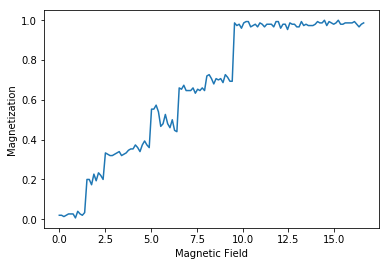

In [72]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [85]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.0
h :  0.20125786163522014
m :  0.013333333333333334
h :  0.30188679245283023
m :  0.013333333333333334
h :  0.4025157232704403
m :  0.02666666666666667
h :  0.5031446540880503
m :  0.013333333333333334
h :  0.6037735849056605
m :  0.02666666666666667
h :  0.7044025157232705
m :  0.02
h :  0.8050314465408805
m :  0.02666666666666667
h :  0.9056603773584906
m :  0.04666666666666667
h :  1.0062893081761006
m :  0.03333333333333333
h :  1.1069182389937107
m :  0.05333333333333334
h :  1.207547169811321
m :  0.08666666666666667
h :  1.308176100628931
m :  0.06666666666666667
h :  1.408805031446541
m :  0.04666666666666667
h :  1.509433962264151
m :  0.17333333333333334
h :  1.610062893081761
m :  0.1466666666666667
h :  1.7106918238993711
m :  0.12666666666666668
h :  1.8113207547169812
m :  0.12
h :  1.9119496855345912
m :  0.12
h :  2.0125786163522013
m :  0.09333333333333334
h :  2.1132075471698113
m :  0.086666666666666

KeyboardInterrupt: 

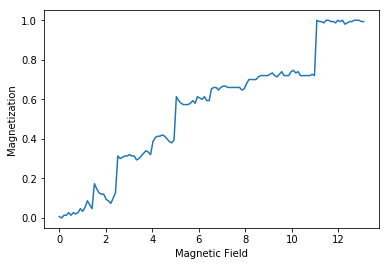

In [86]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [ ]:
# ↓相互作用とハミルトニアンが間違っていた

In [88]:
N_FLIP = 10000

In [89]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.04
h :  0.20125786163522014
m :  0.02
h :  0.30188679245283023
m :  0.04666666666666667
h :  0.4025157232704403
m :  0.03333333333333333
h :  0.5031446540880503
m :  0.04
h :  0.6037735849056605
m :  0.04666666666666667
h :  0.7044025157232705
m :  0.05333333333333334
h :  0.8050314465408805
m :  0.04
h :  0.9056603773584906
m :  0.04
h :  1.0062893081761006
m :  0.006666666666666667
h :  1.1069182389937107
m :  0.02666666666666667
h :  1.207547169811321
m :  0.02666666666666667
h :  1.308176100628931
m :  0.04
h :  1.408805031446541
m :  0.03333333333333333
h :  1.509433962264151
m :  0.18666666666666668
h :  1.610062893081761
m :  0.1466666666666667
h :  1.7106918238993711
m :  0.16666666666666666
h :  1.8113207547169812
m :  0.18666666666666668
h :  1.9119496855345912
m :  0.18666666666666668
h :  2.0125786163522013
m :  0.13333333333333333
h :  2.1132075471698113
m :  0.10000000000000002
h :  2.2138364779874213
m : 

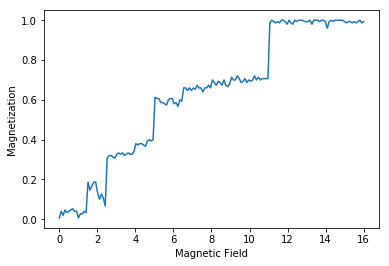

In [90]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [106]:
N_FLIP = 1000


In [107]:
%%time
h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if flip_energy < cur_energy:
                pass
            elif 0.003 > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.006666666666666667
h :  0.10062893081761007
m :  0.02666666666666667
h :  0.20125786163522014
m :  0.013333333333333334
h :  0.30188679245283023
m :  0.013333333333333334
h :  0.4025157232704403
m :  0.02
h :  0.5031446540880503
m :  0.02
h :  0.6037735849056605
m :  0.013333333333333334
h :  0.7044025157232705
m :  0.02
h :  0.8050314465408805
m :  0.02666666666666667
h :  0.9056603773584906
m :  0.03333333333333333
h :  1.0062893081761006
m :  0.05333333333333334
h :  1.1069182389937107
m :  0.05333333333333334
h :  1.207547169811321
m :  0.04666666666666667
h :  1.308176100628931
m :  0.04
h :  1.408805031446541
m :  0.04
h :  1.509433962264151
m :  0.04
h :  1.610062893081761
m :  0.04
h :  1.7106918238993711
m :  0.03333333333333333
h :  1.8113207547169812
m :  0.04666666666666667
h :  1.9119496855345912
m :  0.04666666666666667
h :  2.0125786163522013
m :  0.04
h :  2.1132075471698113
m :  0.04
h :  2.2138364779874213
m :  0.06
h :  2.3144654088050314
m :  0.06
h 

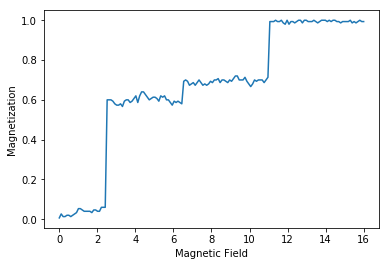

In [108]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [111]:
%%time

T = 10

h_hist = []
m_hist = []
spins = np.random.randint(0, 2, N_SPIN) - 0.5
for h in np.linspace(0, 16, 160):
    m = []
    for i in range(3):
        rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
        # spins = np.random.randint(0, 2, N_SPIN) - 0.5
        for idx in rand_idxs:
            cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
            spins[idx] *= -1.
            flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

            if min(1.0, np.exp(-(flip_energy-cur_energy)/T)) > np.random.rand():
                pass
            else:
                spins[idx] *= -1.
        m.append(abs(sum(spins))/(len(spins)*0.5))
    print('h : ', h)
    print('m : ', sum(m)/len(m))
    h_hist.append(h)
    m_hist.append(sum(m)/len(m))

h :  0.0
m :  0.08
h :  0.10062893081761007
m :  0.05333333333333332
h :  0.20125786163522014
m :  0.08666666666666667
h :  0.30188679245283023
m :  0.09333333333333334
h :  0.4025157232704403
m :  0.02
h :  0.5031446540880503
m :  0.08
h :  0.6037735849056605
m :  0.06666666666666667
h :  0.7044025157232705
m :  0.04666666666666666
h :  0.8050314465408805
m :  0.06
h :  0.9056603773584906
m :  0.09333333333333334
h :  1.0062893081761006
m :  0.05333333333333334
h :  1.1069182389937107
m :  0.07333333333333333
h :  1.207547169811321
m :  0.08666666666666667
h :  1.308176100628931
m :  0.06666666666666667
h :  1.408805031446541
m :  0.05333333333333334
h :  1.509433962264151
m :  0.11333333333333333
h :  1.610062893081761
m :  0.04
h :  1.7106918238993711
m :  0.04
h :  1.8113207547169812
m :  0.1466666666666667
h :  1.9119496855345912
m :  0.04666666666666667
h :  2.0125786163522013
m :  0.08
h :  2.1132075471698113
m :  0.16
h :  2.2138364779874213
m :  0.15333333333333332
h :  2.3144

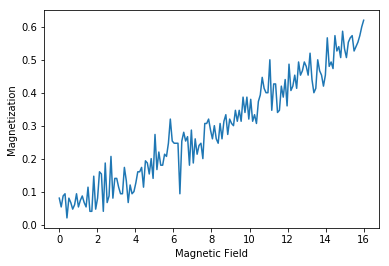

In [112]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [160]:
T = 0.1

In [154]:
def partition_func(spin_configurations, interactions, temperature, b, h=0.0):
    z = 0.
    for sc in spin_configurations:
        energy = spin_hamiltonian(sc, interactions, b, h)
        z += np.exp(-energy/temperature)
    return z

In [155]:
def mean_magnetization(spin_configurations, interactions, temperature, b, h=0.0):
    z = partition_func(spin_configurations, interactions, temperature, b, h)
    mean_m = 0.
    for sc in spin_configurations:
        m = abs(sum(sc))/(len(sc)*0.5)
        energy = spin_hamiltonian(sc, interactions, b, h)
        mean_m += m * np.exp(-energy/temperature)
    return mean_m/z

In [156]:
N_SPIN_CONFIGURATIONS = 1000

In [157]:
spin_configurations = [np.random.randint(0, 2, N_SPIN) - 0.5 for _ in range(N_SPIN_CONFIGURATIONS)]

In [158]:
partition_func(spin_configurations, interactions, temperature=T, b=b, h=0.0)

1.9045954286650212e+273

In [159]:
mean_magnetization(spin_configurations, interactions, temperature=T, b=b, h=30.0)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


nan

In [165]:
h_hist = []
m_hist = []
for h in range(100):
    print('h : ', h)
    m = mean_magnetization(spin_configurations, interactions, temperature=1, b=b, h=h)
    print('m : ', m)
    h_hist.append(h)
    m_hist.append(m)

h :  0
m :  0.002883412059963551
h :  1
m :  0.030219476428239498
h :  2
m :  0.06323814451057268
h :  3
m :  0.11005264028477815
h :  4
m :  0.16332326786950646
h :  5
m :  0.2573008202592756
h :  6
m :  0.33330199227810625
h :  7
m :  0.33987782213647616
h :  8
m :  0.33999778992759827
h :  9
m :  0.3399999596205578
h :  10
m :  0.33999999926083285
h :  11
m :  0.33999999998646385
h :  12
m :  0.33999999999975206
h :  13
m :  0.3399999999999955
h :  14
m :  0.3399999999999999
h :  15
m :  0.34
h :  16
m :  0.34
h :  17
m :  0.34
h :  18
m :  0.34
h :  19
m :  0.34
h :  20
m :  0.34
h :  21
m :  0.34
h :  22
m :  0.34
h :  23
m :  0.34
h :  24
m :  0.34
h :  25
m :  0.34
h :  26
m :  0.34
h :  27
m :  0.34
h :  28
m :  0.34
h :  29
m :  0.34
h :  30
m :  0.34
h :  31
m :  0.34
h :  32
m :  0.34
h :  33
m :  0.34
h :  34
m :  0.34
h :  35
m :  0.34
h :  36
m :  0.34
h :  37
m :  0.34
h :  38


KeyboardInterrupt: 

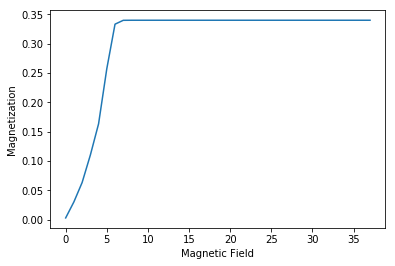

In [166]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [167]:
spin_configurations = [np.random.randint(0, 2, N_SPIN) - 0.5 for _ in range(N_SPIN_CONFIGURATIONS)]

In [168]:
spin_configurations.append(np.ones(N_SPIN)-0.5)

In [169]:
spin_configurations[-1]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [170]:
h_hist = []
m_hist = []
for h in range(100):
    print('h : ', h)
    m = mean_magnetization(spin_configurations, interactions, temperature=1, b=b, h=h)
    print('m : ', m)
    h_hist.append(h)
    m_hist.append(m)

h :  0
m :  0.03587370698944474
h :  1
m :  0.03939883082557348
h :  2
m :  0.05670906323084499
h :  3
m :  0.2201387789100562
h :  4
m :  0.2877957611413629
h :  5
m :  0.320300300593281
h :  6
m :  0.9999999999987219
h :  7
m :  1.0
h :  8
m :  1.0
h :  9
m :  1.0
h :  10
m :  1.0
h :  11
m :  1.0
h :  12
m :  1.0
h :  13


KeyboardInterrupt: 

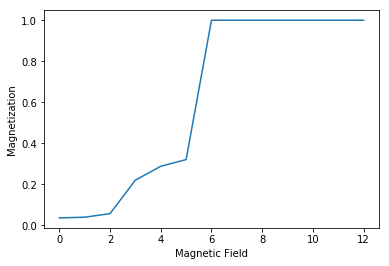

In [171]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [172]:
N_SPIN_CONFIGURATIONS = 50000

In [173]:
spin_configurations = [np.random.randint(0, 2, N_SPIN) - 0.5 for _ in range(N_SPIN_CONFIGURATIONS)]

In [174]:
h_hist = []
m_hist = []
for h in range(100):
    print('h : ', h)
    m = mean_magnetization(spin_configurations, interactions, temperature=1, b=b, h=h)
    print('m : ', m)
    h_hist.append(h)
    m_hist.append(m)

h :  0
m :  0.059945944589537115
h :  1
m :  0.0655577864750059
h :  2
m :  0.15193777039222334
h :  3
m :  0.16495130972969885
h :  4
m :  0.2698834617361824
h :  5
m :  0.30519691126077486
h :  6
m :  0.3302463408390741
h :  7
m :  0.35311749569734585
h :  8
m :  0.35811793231465266
h :  9
m :  0.36134658059383384
h :  10
m :  0.38500801572939886
h :  11
m :  0.4161548733949555
h :  12
m :  0.4197970108807088
h :  13
m :  0.4199898766634674
h :  14
m :  0.4199994961913379
h :  15
m :  0.41999997492183366
h :  16
m :  0.4199999987515261
h :  17
m :  0.41999999993784376
h :  18
m :  0.4199999999969055
h :  19
m :  0.41999999999984594
h :  20
m :  0.4199999999999923
h :  21
m :  0.4199999999999996
h :  22
m :  0.41999999999999993
h :  23
m :  0.42
h :  24
m :  0.42
h :  25
m :  0.42
h :  26
m :  0.41999999999999993
h :  27
m :  0.42
h :  28
m :  0.42
h :  29


KeyboardInterrupt: 

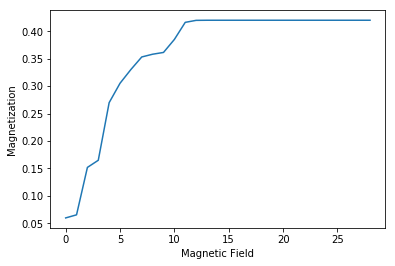

In [175]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

In [176]:
spin_configurations.append(np.ones(N_SPIN)-0.5)

In [177]:
h_hist = []
m_hist = []
for h in range(100):
    print('h : ', h)
    m = mean_magnetization(spin_configurations, interactions, temperature=1, b=b, h=h)
    print('m : ', m)
    h_hist.append(h)
    m_hist.append(m)

h :  0
m :  0.059945944589537115
h :  1
m :  0.0655577864750059
h :  2
m :  0.15193777039222334
h :  3
m :  0.16495130972969885
h :  4
m :  0.2698834617361824
h :  5
m :  0.3051969113642761
h :  6
m :  0.99999384542837
h :  7
m :  1.0
h :  8


KeyboardInterrupt: 

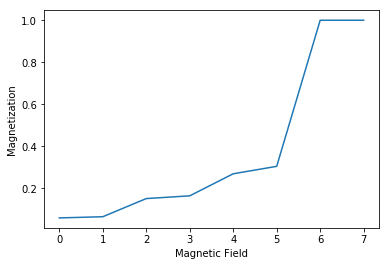

In [178]:
plt.xlabel('Magnetic Field')
plt.ylabel('Magnetization')
plt.plot(h_hist, m_hist)

(array([1.1772e+04, 7.4370e+03, 6.6470e+03, 5.8720e+03, 8.7360e+03,
        2.9400e+03, 2.2310e+03, 1.5970e+03, 1.7800e+03, 4.2300e+02,
        2.5900e+02, 2.3200e+02, 3.4000e+01, 2.4000e+01, 9.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

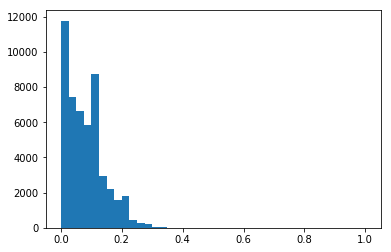

In [181]:
m = []
for sc in spin_configurations:
    m.append(abs(sum(sc))/(len(sc)*0.5))
plt.hist(m, bins=40)

1000


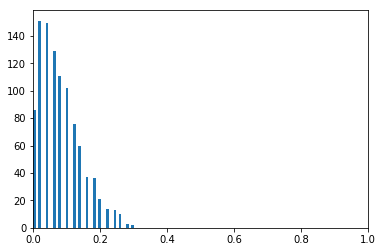

10000


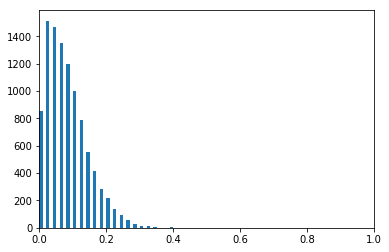

100000


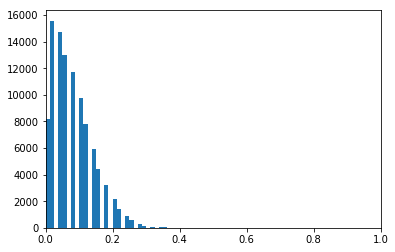

500000


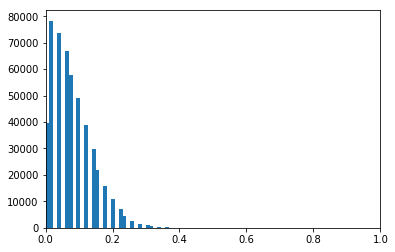

1000000


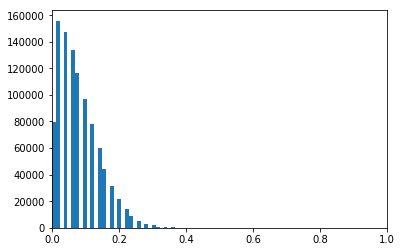

In [183]:
for n in (1000, 10000, 100000, 500000, 1000000):
    print(n)
    spin_configurations = [np.random.randint(0, 2, N_SPIN) - 0.5 for _ in range(n)]
    m = []
    for sc in spin_configurations:
        m.append(abs(sum(sc))/(len(sc)*0.5))
    plt.xlim([0,1])
    plt.hist(m, bins=40)
    plt.show()

In [21]:
J = 5.0*np.random.rand(7)

In [22]:
J

array([0.21136733, 2.42065159, 0.1273134 , 1.2195474 , 4.54583879,
       1.25806279, 1.87964668])

In [25]:
def calc_magnetization(interactions, b, h_range=np.linspace(0, 16, 160)):
    h_hist = []
    m_hist = []
    spins = np.random.randint(0, 2, N_SPIN) - 0.5
    #for h in np.linspace(0, 16, 160):
    for h in h_range:
        m = []
        for i in range(3):
            rand_idxs = np.random.randint(0, N_SPIN, N_FLIP)
            # spins = np.random.randint(0, 2, N_SPIN) - 0.5
            for idx in rand_idxs:
                cur_energy = spin_hamiltonian(spins, interactions, b, h=h)
                spins[idx] *= -1.
                flip_energy = spin_hamiltonian(spins, interactions, b, h=h)

                if flip_energy < cur_energy:
                    pass
                elif 0.003 > np.random.rand():
                    pass
                else:
                    spins[idx] *= -1.
            m.append(abs(sum(spins))/(len(spins)*0.5))
        print('h : ', h)
        print('m : ', sum(m)/len(m))
        h_hist.append(h)
        m_hist.append(sum(m)/len(m))
    return m_hist, h_hist

In [29]:
def calc_loss(J, interactions, b, teacher_magnetization, h_range=np.linspace(0, 16, 160), reg=0.1):
    calculated_magnetization = calc_magnetization(interactions, b, h_range)
    loss = 0.
    for cm, tm in zip(calculated_magnetization, teacher_magnetization):
        loss += abs(cm-tm)
    loss += reg*sum([abs(j) for j in J])
    return loss

In [28]:
def calc_grad_loss_respect_to_J(J, b, h_range=np.linspace(0, 16, 160), DELTA_J=0.1, reg=0.1):

    grad_J = []
    for i, j in enumerate(J):
        J_bak = J.copy()
        J[i] -= DELTA_J

        interactions = {
            0: {-3: J[3], -2: J[1], -1: J[0], 1: J[0], 2: J[1], 3: J[3]},
            1: {-3: J[4], -2: J[5], -1: J[0], 1: J[2], 2: J[0], 4: J[5]},
            2: {-4: J[6], -3: J[4], -2: J[1], -1: J[2], 1: J[1], 2: J[6], 3: J[4]},
            3: {-3: J[3], -2: J[0], -1: J[1], 1: J[1], 2: J[0], 3: J[3]},
            4: {-3: J[4], -2: J[6], -1: J[1], 1: J[2], 2: J[1], 3: J[4], 4: J[6]},
            5: {-4: J[5], -3: J[4], -2: J[0], -1: J[2], 1: J[0], 2: J[5], 3: J[4]}
        }
        backword_loss = calc_loss(J, interactions, b, teacher_magnetization, h_range)
        
        J = J_bak.copy()
        
        J[i] += DELTA_J
        interactions = {
            0: {-3: J[3], -2: J[1], -1: J[0], 1: J[0], 2: J[1], 3: J[3]},
            1: {-3: J[4], -2: J[5], -1: J[0], 1: J[2], 2: J[0], 4: J[5]},
            2: {-4: J[6], -3: J[4], -2: J[1], -1: J[2], 1: J[1], 2: J[6], 3: J[4]},
            3: {-3: J[3], -2: J[0], -1: J[1], 1: J[1], 2: J[0], 3: J[3]},
            4: {-3: J[4], -2: J[6], -1: J[1], 1: J[2], 2: J[1], 3: J[4], 4: J[6]},
            5: {-4: J[5], -3: J[4], -2: J[0], -1: J[2], 1: J[0], 2: J[5], 3: J[4]}
        }
        forword_loss = calc_loss(J, interactions, b, teacher_magnetization, h_range)
        grad_J.append((forword_loss-backword_loss)/(2*DELTA_J))
        
        J = J_bak.copy()
    
    return grad_J